### Bag of N grams
### Generate N grams using CountVectorize

In [30]:
from sklearn.feature_extraction.text import CountVectorizer


In [31]:
v= CountVectorizer()
v.fit(['Thor Hathodawala is looking for a job'])
print(v.vocabulary_)

{'thor': 5, 'hathodawala': 1, 'is': 2, 'looking': 4, 'for': 0, 'job': 3}


In [32]:
## Uni-Gram
v= CountVectorizer(ngram_range=(1, 1))
v.fit(['Thor Hathodawala is looking  for a job'])
print(v.vocabulary_)

{'thor': 5, 'hathodawala': 1, 'is': 2, 'looking': 4, 'for': 0, 'job': 3}


In [33]:
## Bi-Gram
v=CountVectorizer()
v.fit(['Thor Hathodawala is looking for a job'])
print(v.vocabulary_)

{'thor': 5, 'hathodawala': 1, 'is': 2, 'looking': 4, 'for': 0, 'job': 3}


In [34]:
## Tri-Gram
v= CountVectorizer()
v.fit(['Thor Hathodawala is looking for a job'])
print(v.vocabulary_)

{'thor': 5, 'hathodawala': 1, 'is': 2, 'looking': 4, 'for': 0, 'job': 3}


### Now, taking a sample collection of text documents, preprocess them to remove stop words, lemmatize etc.
### Then, Generating Bag of 1 grams and 2 grams from it.


In [35]:
corpus= [
    "Thor ate pizza",
    "Loki is tall",
    "Loki is eating pizza"
]

In [36]:
import spacy

In [38]:
# load english language model and create npl object from it
nlp= spacy.load('en_core_web_sm')

def preprocess(text):
  #remove stop words and lemmatize the text
  doc= nlp(text)
  filtered_tokens= []
  for token in  doc:

    if token.is_stop or token.is_punct:
      continue

    filtered_tokens.append(token.lemma_)
  return ' '.join(filtered_tokens)

In [23]:
preprocess('Thor ate pizza')

'thor eat pizza'

In [39]:
corpus_processed= [preprocess(text) for text in corpus]
print(corpus_processed)

['thor eat pizza', 'Loki tall', 'Loki eat pizza']


In [40]:
v= CountVectorizer(ngram_range=(1, 2))
v.fit(corpus_processed)
print(v.vocabulary_)

{'thor': 7, 'eat': 0, 'pizza': 5, 'thor eat': 8, 'eat pizza': 1, 'loki': 2, 'tall': 6, 'loki tall': 4, 'loki eat': 3}


Now, Generating Bag of Ngram vector for few sample documents

In [41]:
v.transform(['Thor eat pizza']).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 1, 1]])

### News Category Classification Problem
Okay now that we know basics of BAG of n grams vectorizer 😎 It is the time to work on a real problem. Here we want to do a news category classification. We will use bag of n-grams and traing a machine learning model that can categorize any news into one of the following categories,

1-BUSINESS

2-SPORTS

3-CRIME

4-SCIENCE

In [44]:
import pandas as pd
df = pd.read_json('/News_Category_Dataset_v3.json', lines=True, encoding='utf-8')[['headline', 'category']]
print(df.shape)
print(df.head())

(209527, 2)
                                            headline   category
0  Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS
1  American Airlines Flyer Charged, Banned For Li...  U.S. NEWS
2  23 Of The Funniest Tweets About Cats And Dogs ...     COMEDY
3  The Funniest Tweets From Parents This Week (Se...  PARENTING
4  Woman Who Called Cops On Black Bird-Watcher Lo...  U.S. NEWS


In [45]:
df.category.value_counts()

,count
category,
POLITICS,35602
WELLNESS,17945
ENTERTAINMENT,17362
TRAVEL,9900
STYLE & BEAUTY,9814
PARENTING,8791
HEALTHY LIVING,6694
QUEER VOICES,6347
FOOD & DRINK,6340


In [46]:
# Select only rows where the category is in a list of desired values
desired_categories= ['CRIME', 'COMEDY', 'EDUCATION', 'SPORTS']
df_new= df[df['category'].isin(desired_categories)]
df_new.head()

,headline,category
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY
17,"Maury Wills, Base-Stealing Shortstop For Dodge...",SPORTS
26,"Las Vegas Aces Win First WNBA Title, Chelsea G...",SPORTS
61,Boston Marathon To Make Race More Inclusive Fo...,SPORTS
62,"Anthony Varvaro, MLB Pitcher Turned Transit Co...",SPORTS


In [47]:
print(df_new.headline.shape)
print(df_new.category.shape)

(15053,)
(15053,)


In [48]:
df_new.category.value_counts()

,count
category,
COMEDY,5400
SPORTS,5077
CRIME,3562
EDUCATION,1014


In [49]:
min_samples= 1014 #we have these many of education articles
df_comedy= df_new[df_new.category== 'COMEDY'].sample(min_samples, random_state= 2022)
df_sports= df_new[df_new.category== 'SPORTS'].sample(min_samples, random_state= 2022)
df_crime= df_new[df_new.category== 'CRIME'].sample(min_samples, random_state= 2022)
df_education= df_new[df_new.category =='EDUCATION'].sample(min_samples, random_state= 2022)


In [50]:
df_balanced= pd.concat([df_comedy, df_sports, df_crime, df_education], axis=0)
df_balanced.category.value_counts()

,count
category,
COMEDY,1014
SPORTS,1014
CRIME,1014
EDUCATION,1014


In [51]:
# target ={'COMEDY': 0, 'SPORTS': 1, 'CRIME': 2, 'EDUCATION': 3}
df_balanced['category_num']= df_balanced['category'].map({
    'COMEDY': 0,
    'SPORTS': 1,
    'CRIME': 2,
    'EDUCATION': 3
})

In [64]:
df_balanced.tail()

,headline,category,category_num,preprocessed_txt
111169,The Global Search for Education: Our Global To...,EDUCATION,3,Global Search Education Global 12 teacher blog
106643,Reflections of an Octogenarian IV: Whatever Ha...,EDUCATION,3,reflection Octogenarian IV happen Core Core Cu...
32087,"For The Future Of Education, Answer The Callin...",EDUCATION,3,Future Education Answer calling classroom
37277,America's Charter Schools Have A Commitment Pr...,EDUCATION,3,America Charter Schools Commitment Problem
125885,3 Tips for Using Video Interviews to Hire Grea...,EDUCATION,3,3 tip Video Interviews hire Great Teachers


Build a model with original text(no pre processing)

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    df_balanced.headline,
    df_balanced.category_num,
    test_size=0.2,#20% samples will go to test dataset
    random_state= 2023,
    stratify= df_balanced.category_num
)

In [66]:
print(X_train.shape)
print(X_train.head())

(3244,)
1506      Prosecution Rests In Sex-abuse Trial Of Ghisla...
92574     Jury Moves Closer To Death Penalty In James Ho...
47816     In A Crappy Year, These Sports Moments Brought...
92386     Shots Reported For 2nd Day At Mississippi Mili...
113680                              Stop Lying to Yourself!
Name: headline, dtype: object


In [67]:
Y_train.value_counts()

,count
category_num,
2,811
1,811
3,811
0,811


In [68]:
Y_test.value_counts()

,count
category_num,
1,203
3,203
2,203
0,203


Attemp1: Use 1-gram which is nothing but a Bag Of Words(BOW) model


In [70]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. create a pipeline object
clf= Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range= (1, 1))),
    ('Multi NB', MultinomialNB())
])

#2. fit with X_train and Y_train
clf.fit(X_train, Y_train)

#3. get the predictions for X_test and store it in Y_pred
Y_pred= clf.predict(X_test)

#4. print the classification report
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       0.86      0.81      0.84       203
           1       0.82      0.79      0.80       203
           2       0.87      0.91      0.89       203
           3       0.84      0.89      0.86       203

    accuracy                           0.85       812
   macro avg       0.85      0.85      0.85       812
weighted avg       0.85      0.85      0.85       812



In [71]:
X_test[:8]
#target= {'COMEDY: 0, 'SPORTS': 1, 'CRIME':2, 'EDUCATION': 3}

,headline
65762,11 Law Professors Say Tom Brady Is Right And T...
19832,Florida's Teacher Gap Is No Mystery
85480,Richard Sherman Explains A Weekly Contradictio...
20592,Teacher Seniority: The Seat Belts Of The Educa...
95561,"What to Watch for in the FIFA Case, Part 5: Va..."
80283,Shoplifter Shot And Killed After Running Over ...
94008,F1 Driver Jules Bianchi Dies 9 Months After Su...
93093,Jen Welter To Become First Female Coach In NFL...


In [72]:
Y_pred[:8]

array([1, 3, 1, 3, 3, 2, 2, 1])

Attemp 2: Use 1-gram and bigrams


In [74]:
#1. create a pipeline object
clf= Pipeline([
    ('vectorizer_1_2_gram', CountVectorizer(ngram_range= (1, 2))),
    ('Multi NB', MultinomialNB())
])

#2. fir with X_train and Y_train
clf.fit(X_train, Y_train)

#3. get the predictions for X_test and store it Y_pred
Y_pred= clf.predict(X_test)

#4. print the classfication report
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       0.84      0.81      0.83       203
           1       0.83      0.77      0.80       203
           2       0.87      0.92      0.89       203
           3       0.84      0.87      0.86       203

    accuracy                           0.84       812
   macro avg       0.84      0.84      0.84       812
weighted avg       0.84      0.84      0.84       812



Attemp 3: Use 1-gram to trigrams


In [75]:
#1. create a pipeline object
clf= Pipeline([
    ('vectorizer_1_2_gram', CountVectorizer(ngram_range= (1, 3))),
    ('Multi NB', MultinomialNB())
])

#2. fir with X_train and Y_train
clf.fit(X_train, Y_train)

#3. get the predictions for X_test and store it Y_pred
Y_pred= clf.predict(X_test)

#4. print the classfication report
print(classification_report(Y_test, Y_pred))



              precision    recall  f1-score   support

           0       0.83      0.82      0.83       203
           1       0.83      0.77      0.80       203
           2       0.86      0.92      0.89       203
           3       0.85      0.87      0.86       203

    accuracy                           0.84       812
   macro avg       0.84      0.84      0.84       812
weighted avg       0.84      0.84      0.84       812



Use text pre_prcessing to remove stop words, punctuations and apply lemmatization


In [76]:
df_balanced['preprocessed_txt']= df_balanced['headline'].apply(preprocess)

In [77]:
df_balanced.head()

,headline,category,category_num,preprocessed_txt
15312,"Trevor Noah Calls Out Hillary Clinton, And He'...",COMEDY,0,Trevor Noah call Hillary Clinton joke
126777,What Sorcery Is This?,COMEDY,0,Sorcery
47238,"Hi, Death? I'd Like To Speak To Your Manager, ...",COMEDY,0,Hi Death like speak Manager
119663,...New Again?,COMEDY,0,New
30724,"There Was No Audio, So We Captioned The Trump ...",COMEDY,0,audio caption Trump Putin Meeting


Build a model with pre processed text

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(
    df_balanced.preprocessed_txt,
    df_balanced.category_num,
    test_size= 0.2, #20% samples will go to test  dataset
    random_state= 2023,
    stratify= df_balanced.category_num
)

In [79]:
print(X_train.shape)
print(X_train.head())

(3244,)
1506      prosecution Rests sex abuse Trial Ghislaine Ma...
92574      jury move close Death Penalty James Holmes Trial
47816                  Crappy Year Sports Moments bring Joy
92386         shot report 2nd Day Mississippi Military Site
113680                                             stop lie
Name: preprocessed_txt, dtype: object


In [80]:
Y_train.value_counts()

,count
category_num,
2,811
1,811
3,811
0,811


In [81]:
Y_test.value_counts()

,count
category_num,
1,203
3,203
2,203
0,203


In [84]:
#1. create a pipeline object
clf= Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range= (1, 2))),
    ('Multi NB', MultinomialNB())
])

#2. fit with X_train and Y_train
clf.fit(X_train, Y_train)

#3. get the predictions for X_test and store it in Y_pred
Y_pred = clf.predict(X_test)

#4. print the classification report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       203
           1       0.82      0.81      0.81       203
           2       0.86      0.92      0.89       203
           3       0.86      0.84      0.85       203

    accuracy                           0.84       812
   macro avg       0.84      0.84      0.84       812
weighted avg       0.84      0.84      0.84       812



Plot confusion matrix

In [85]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(Y_test, Y_pred)
cm

array([[160,  19,  10,  14],
       [ 15, 165,  15,   8],
       [  6,   5, 187,   5],
       [ 14,  13,   6, 170]])

Text(95.72222222222221, 0.5, 'Truth')

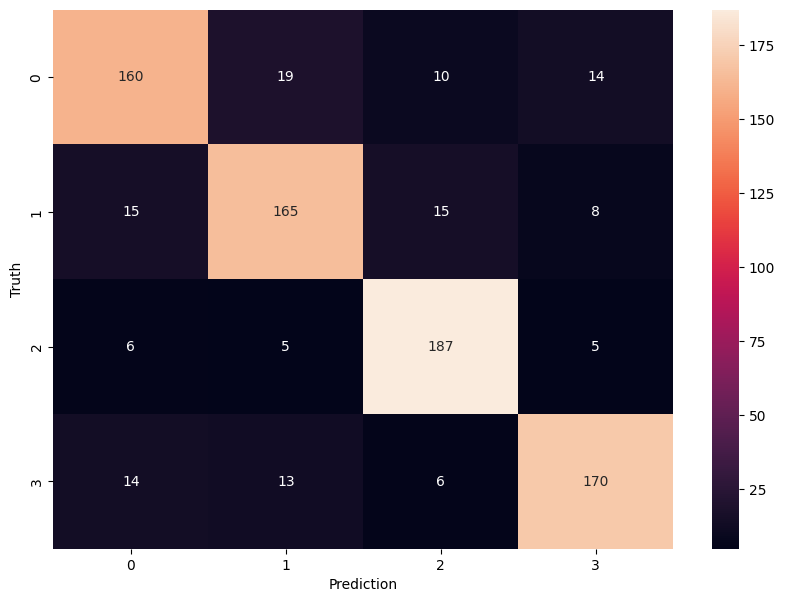

In [88]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt= 'd')
plt.xlabel('Prediction')
plt.ylabel('Truth')